# Preparación

In [ ]:
import numpy as np
import csv
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn import svm, preprocessing
from sklearn.ensemble import AdaBoostClassifier
from tabulate import tabulate
import matplotlib.pyplot as plt

In [ ]:
!pip show numpy

Name: numpy
Version: 1.22.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, chex, cmdstanpy, contourpy, cufflinks, cvxpy, datascience, db-dtypes, dopamine-rl, ecos, flax, folium, gensim, gym, h5py, holoviews, hyperopt, imageio, imbalanced-learn, imgaug, jax, jaxlib, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, opencv-contrib-python, opencv-python, opencv-python-headless, opt-einsum, optax, orbax-checkpoint, osqp, pandas, pandas-gbq, patsy, plotnine, prophet, pyarrow, pycocotools, pyerfa, pymc, pytensor, python-louvain, PyWavelets, qdldl, qudida, scikit-image, scikit-learn, scipy, scs, seaborn, shapely, sklearn-pandas, soxr, spacy, statsmodels, tabl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ipywidgets
# To enable `ipywidgets`
!jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.8 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from ipywidgets import widgets
from IPython.display import display

In [ ]:
!pip install -q gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 56.8 MB/s eta 0:00:00


Esta librería nos va a permitir ver el tiempo de ejecución de todas las celdas en el cuaderno.

In [ ]:
%%capture
!pip install ipython-autotime
%load_ext autotime

time: 687 µs (started: 2023-06-28 20:44:33 +00:00)


# Recolección de datos

Gracias a la celda de abajo, el usuario puede seleccionar el conjunto de datos que se va a utilizar en esta ejecución.

Se recomienda ejecutar esta celda antes de ejecutar el resto del cuaderno. Por defecto, se utilizará el conjunto DoS_stratified.csv

In [ ]:
dropdown = widgets.Dropdown(options =["DoS", "Fuzzy", "Gear", "RPM"])
output = widgets.Output()
path = '/content/drive/MyDrive/tfg/datasets/DoS_stratified.csv'

def select(change):
  global path
  output.clear_output()
  if(change.new == 'DoS'):
    with output:
      path = '/content/drive/MyDrive/tfg/datasets/DoS_stratified.csv'
  elif(change.new == 'Fuzzy'):
    with output:
      path = '/content/drive/MyDrive/tfg/datasets/Fuzzy_stratified.csv'
  elif(change.new == 'Gear'):
    with output:
      path = '/content/drive/MyDrive/tfg/datasets/gear_stratified.csv'
  elif(change.new == 'RPM'):
    with output:
      path = '/content/drive/MyDrive/tfg/datasets/RPM_stratified.csv'
  else:
    with output:
      display("Error: option not found")

dropdown.observe(select, names="value")
display(dropdown)
display(output)

Dropdown(options=('DoS', 'Fuzzy', 'Gear', 'RPM'), value='DoS')

Output()

time: 20.9 ms (started: 2023-06-28 21:17:49 +00:00)


In [ ]:
columns = ['Tiempo', 'ID', 'DLC', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'Etiqueta', 'Delta']
df = pd.read_csv(path, delimiter=',', header=0, names=columns,
                 dtype={'ID':int, 'DLC':int, 'M1':int, 'M2':int, 'M3':int, 'M4':int,
                         'M5':int, 'M6':int, 'M7':int, 'M8':int, 'Etiqueta':int, 'Delta':'float32'},
                 parse_dates = ['Tiempo'], engine='python')

time: 38.7 s (started: 2023-06-28 21:17:56 +00:00)


In [ ]:
%%capture
time_column = ['Tiempo']
x_columns = ['ID', 'DLC', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'Delta']
y_columns = ['Etiqueta']

time: 709 µs (started: 2023-06-28 21:18:34 +00:00)


# Modelling


## Instalación de D-Wave

In [ ]:
%%capture
!pip install dwave-ocean-sdk

time: 5.94 s (started: 2023-06-28 21:18:34 +00:00)


In [ ]:
%%capture
!git clone https://github.com/dwavesystems/dwave-ocean-sdk.git
!cd dwave-ocean-sdk
!python setup.py install

time: 312 ms (started: 2023-06-28 21:18:40 +00:00)


In [ ]:
import numpy.lib.recfunctions as rfn
import dimod
from dwave.system import LeapHybridSampler, EmbeddingComposite
from dwave.system.samplers import DWaveSampler

time: 797 µs (started: 2023-06-28 21:18:41 +00:00)


Para poder acceder a los ordenadores de D-Wave, es necesario crear una cuenta en D-Wave Leap. Después de hacerlo, es necesario guardar el token asociado con tu cuenta en un archivo llamado "token.txt" y subirlo al entorno de ejecución.

In [ ]:
def get_token(path):
  with open("token.txt", "r") as file:
    token = file.read()

  return token

time: 688 µs (started: 2023-06-28 21:18:41 +00:00)


In [ ]:
%%capture
endpoint = 'https://cloud.dwavesys.com/sapi'
token = get_token('token.txt')

time: 443 µs (started: 2023-06-28 21:18:41 +00:00)


## Algoritmos clásicos

El objetivo de esta sección es la creación de modelos de aprendizaje clásicos en condiciones normales, con el conjunto de datos de entrada en su totalidad.

In [ ]:
ds = df.drop(time_column, axis=1)

train, test = train_test_split(ds, test_size=0.2, random_state=42)

x_train = train[x_columns]
y_train = train[y_columns]

x_test = test[x_columns]
y_test = test[y_columns]

time: 1.74 s (started: 2023-06-28 21:18:41 +00:00)


### SVM

In [ ]:
%%capture
svmClf = svm.SVC(kernel='linear', max_iter=100, class_weight='balanced')
svmClf.fit(x_train, y_train)

time: 6.97 s (started: 2023-06-28 21:18:43 +00:00)


In [ ]:
y_pred = svmClf.predict(x_test)

time: 639 ms (started: 2023-06-28 21:18:49 +00:00)


In [ ]:
f1_sc = f1_score(y_test, y_pred, average='micro')
print(f'F1 Score Result: {f1_sc}')

F1 Score Result: 1.0
time: 427 ms (started: 2023-06-28 21:18:50 +00:00)


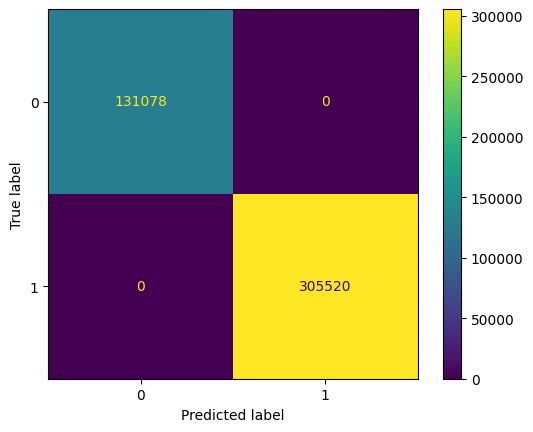

time: 519 ms (started: 2023-06-28 21:18:51 +00:00)


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=svmClf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svmClf.classes_)
disp.plot()
plt.show()

### AdaBoost

In [ ]:
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
adaClf = AdaBoostClassifier(estimator=clf, n_estimators=100, random_state=42)
adaClf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_estimators=100, random_state=42)

time: 9.33 s (started: 2023-06-28 21:18:51 +00:00)


In [ ]:
y_pred = adaClf.predict(x_test)

time: 352 ms (started: 2023-06-28 21:19:01 +00:00)


In [ ]:
f1_sc = f1_score(y_test, y_pred, average='micro')
print(f'F1 Score Result: {f1_sc}')

F1 Score Result: 1.0
time: 719 ms (started: 2023-06-28 21:19:01 +00:00)


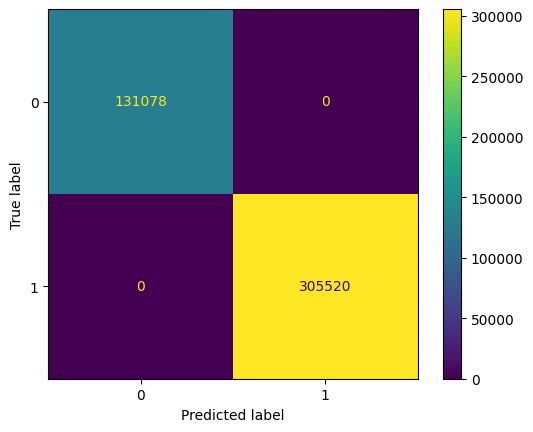

time: 846 ms (started: 2023-06-28 21:19:02 +00:00)


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=adaClf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaClf.classes_)
disp.plot()
plt.show()

## Comparación de algoritmos SVM

El objetivo de esta sección es la comparación de modelos basados en Support Vector Machine, tanto el clásico como el basado en Quantum Support Vector Machine, bajo las mismas condiciones. Ambos utilizarán un conjunto de datos de entrada reducido debido a las limitaciones que tiene el modelo basado en QSVM.

En caso de que se quiera ejecutar el QSVM, es necesario muestrear el conjunto de datos para reducir su tamaño. Esto es debido a que, con un conjunto de datos más grande, es necesario utilizar mas cúbits de los que D-Wave nos puede brindar.

In [ ]:
ds = df.sample(n=40, replace=False, random_state=42)

time: 187 ms (started: 2023-06-28 21:19:03 +00:00)


In [ ]:
ds = ds.drop(time_column, axis=1)

train, test = train_test_split(ds, test_size=0.2, random_state=42)

x_train = train[x_columns]
y_train = train[y_columns]

x_test = test[x_columns]
y_test = test[y_columns]

time: 10.8 ms (started: 2023-06-28 21:19:03 +00:00)


### Classic

In [ ]:
%%capture
svmClf = svm.SVC(kernel='linear', max_iter=100, class_weight='balanced')
svmClf.fit(x_train, y_train)

time: 21.2 ms (started: 2023-06-28 21:19:03 +00:00)


In [ ]:
y_pred = svmClf.predict(x_test)

time: 4.04 ms (started: 2023-06-28 21:19:03 +00:00)


In [ ]:
f1_sc = f1_score(y_test, y_pred, average='micro')
print(f'F1 Score Result: {f1_sc}')

F1 Score Result: 1.0
time: 24.4 ms (started: 2023-06-28 21:19:03 +00:00)


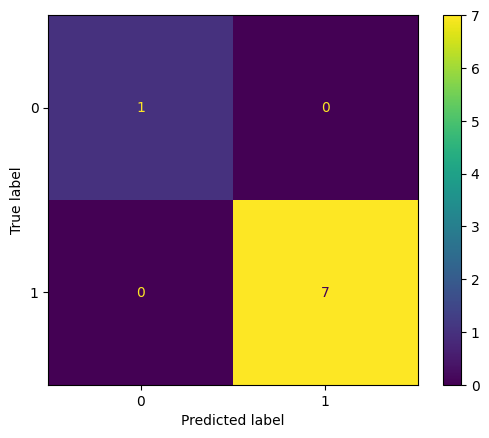

time: 855 ms (started: 2023-06-28 21:19:03 +00:00)


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=adaClf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaClf.classes_)
disp.plot()
plt.show()

### Adiabatic (QSVM)

Es necesario realizar una serie de transformaciones a los conjuntos de entrenamiento y de prueba para poder utilizarlos en un modelo QSVM.

In [ ]:
train, test = train_test_split(ds, test_size=0.2, random_state=42)

x_train = preprocessing.scale(train[x_columns].to_numpy())
y_train = train[y_columns]
y_train['Etiqueta'] = y_train['Etiqueta'].apply(lambda cell : -1 if cell == 0 else 1)
y_train = y_train.to_numpy()

x_test = preprocessing.scale(test[x_columns].to_numpy())
y_test = test[y_columns]
y_test['Etiqueta'] = y_test['Etiqueta'].apply(lambda cell : -1 if cell == 0 else 1)
y_test = y_test.to_numpy()

time: 13.6 ms (started: 2023-06-28 21:19:04 +00:00)


<ipython-input-171-3e0a7d7ff7f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Etiqueta'] = y_train['Etiqueta'].apply(lambda cell : -1 if cell == 0 else 1)
<ipython-input-171-3e0a7d7ff7f9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Etiqueta'] = y_test['Etiqueta'].apply(lambda cell : -1 if cell == 0 else 1)


Estas funciones son las que vamos a utilizar para construir nuestro modelo QSVM.

In [ ]:
def kernel(xn, xm, gamma=-1):
    if gamma == -1:
        return xn @ xm.T
    xn = np.atleast_2d(xn)
    xm = np.atleast_2d(xm)
    return np.exp(-gamma * np.sum((xn[:,None] - xm[None,:])**2, axis=-1))

def gen_svm_qubos(B,K,xi,gamma, train, labels):
    N = len(train)

    Q = np.zeros((K*N,K*N))
    print(f'Creating the QUBO of size {Q.shape}')
    for n in range(N):
        for m in range(N):
            for k in range(K):
                for j in range(K):
                    Q[K*n+k,K*m+j] = .5 * B**(k+j) * labels[n] * labels[m] * (kernel(train[n], train[m], gamma) + xi)
                    if n == m and k == j:
                        Q[K*n+k,K*m+j] += - B**k

    Q = np.triu(Q) + np.tril(Q,-1).T # turn the symmetric matrix into upper triangular

    return Q

time: 7.11 ms (started: 2023-06-28 21:19:04 +00:00)


In [ ]:
def train_qsvm(B, K, xi, gamma):
  Q = gen_svm_qubos(B, K, xi, gamma, x_train, y_train)

  sampler = EmbeddingComposite(DWaveSampler(token=token, endpoint=endpoint))
  response = sampler.sample_qubo(Q, label='QBoost')

  return response

time: 836 µs (started: 2023-06-28 21:19:04 +00:00)


In [ ]:
def predict(B, K, xi, gamma, alphas, data, label, datatest):

    C=(B**np.arange(K)).sum()

    b = calculate_bias(alphas, data, label, gamma, C)

    scoretest = distance_to_hyperplane(datatest, alphas, data, label, gamma, b)

    return scoretest

def distance_to_hyperplane(x, alphas, data, label, gamma, b=0): # evaluates the distance to the hyper plane according to 16.5.32 on p. 891 (Numerical Recipes); sign is the assigned class; x.shape = ...xD
    return np.sum((alphas * label)[:,None] * kernel(data, x, gamma), axis=0) + b

def calculate_bias(alphas, data, label, gamma, C): # evaluates offset b according to 16.5.33
    cross = distance_to_hyperplane(data, alphas, data, label, gamma)
    return np.sum(alphas * (C-alphas) * (label - cross)) / np.sum(alphas * (C-alphas))


time: 1.42 ms (started: 2023-06-28 21:19:04 +00:00)


In [ ]:
def decode(binary, B=2, K=3):
  N = len(binary) // K
  Bvec = B ** np.arange(K)
  return np.fromiter(binary,float).reshape(N,K) @ Bvec

def predict_score_qsvm(B, K, xi, gamma, data, label, x_test, response):
  samples = np.array([''.join(map(str,sample)) for sample in response.record['sample']])
  unique_samples, unique_idx, unique_counts = np.unique(samples, return_index=True, return_counts=True)
  unique_records = response.record[unique_idx]
  result = rfn.merge_arrays((unique_samples, unique_records['energy'], unique_counts, unique_records['chain_break_fraction']))
  result = result[np.argsort(result['f1'])]
  MAXRESULTS = 20

  alphas = np.array([decode(sample,B,K) for sample in result['f0'][:MAXRESULTS]])
  alphas = alphas.reshape(len(alphas[0]), 1)
  scores = predict(B, K, xi, gamma, alphas, data, label, x_test)

  return scores

time: 4.67 ms (started: 2023-06-28 21:19:04 +00:00)


In [ ]:
def predict_labels_qsvm(scores):
  avg_scores=np.zeros((scores[0].shape[0]))
  Y_predicted=np.zeros((scores[0].shape[0]),int)

  for i in range(0,scores[0].shape[0]):
      tmp=0
      for y in range(0,1):
          tmp=tmp+scores[y][i]
      avg_scores[i]=tmp/1

  for i in range(0,scores[0].shape[0]):
      if(avg_scores[i]<0):
          Y_predicted[i]=-1
      else:
          Y_predicted[i]=1


  return Y_predicted

def f1_score_qsvm(y_pred, y_test):
  tp = 0
  fn = 0
  fp = 0

  for i in range(len(y_pred)):
    if(y_pred[i] == y_test[i] and y_pred[i] == 1):
      tp += 1
    elif(y_pred[i] == 1 and y_test[i] == -1):
      fp += 1
    elif(y_pred[i] == -1 and y_test[i] == 1):
      fn += 1

  if tp + fn == 0 or tp + fp == 0:
    return 0

  recall = tp / (tp + fn)
  precision = tp / (tp + fp)
  f1_score = 2 * precision * recall / (precision + recall)

  return f1_score

time: 2.03 ms (started: 2023-06-28 21:19:04 +00:00)


Vamos a utilizar estos parámetros recomendados por D-Wave para esta primera iteración.

In [ ]:
B = 2
K = 2
xi = 0
gamma = -1

time: 1.1 ms (started: 2023-06-28 21:19:04 +00:00)


In [ ]:
response = train_qsvm(B, K, xi, gamma)

Creating the QUBO of size (64, 64)
time: 42.2 s (started: 2023-06-28 21:19:04 +00:00)


In [ ]:
scores = predict_score_qsvm(B, K, xi, gamma, x_train, y_train, x_test, response)
y_pred = predict_labels_qsvm(scores)

time: 1.93 s (started: 2023-06-28 21:19:46 +00:00)


In [ ]:
print(y_pred)
test_labels = y_test.reshape(1, len(y_test))[0]
print(test_labels)
print(f1_score_qsvm(y_pred, test_labels))

[-1  1 -1  1 -1  1  1 -1]
[ 1  1  1  1  1  1 -1  1]
0.5454545454545454
time: 6.68 ms (started: 2023-06-28 21:19:48 +00:00)


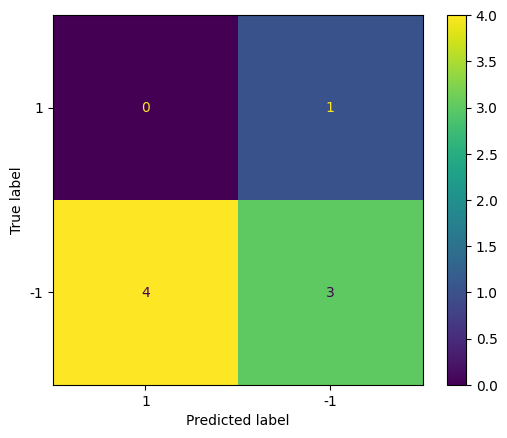

time: 394 ms (started: 2023-06-28 21:19:48 +00:00)


In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels={-1, 1})
disp.plot()
plt.show()

## Comparación de algoritmos AdaBoost

El objetivo de esta sección es la comparación de modelos basados en Gradient Boosting, tanto Adaptive Boosting clásico como Quantum Boosting, bajo las mismas condiciones. Ambos utilizarán un conjunto de datos de entrada reducido debido a las limitaciones que tiene el modelo basado en QBoost.

En caso de que se quiera ejecutar el QBoost, es necesario muestrear el conjunto de datos para reducir su tamaño. Esto es debido a que es necesaria una gran cantidad de almacenamiento si queremos utilizar conjuntos más grandes.

In [ ]:
ds = df.sample(n=10000, replace=False, random_state=42)

time: 212 ms (started: 2023-06-28 21:19:49 +00:00)


In [ ]:
%%capture
ds = ds.drop(time_column, axis=1)

train, test = train_test_split(ds, test_size=0.2, random_state=42)

x_train = train[x_columns]
y_train = train[y_columns]

x_test = test[x_columns]
y_test = test[y_columns]

time: 19 ms (started: 2023-06-28 21:19:49 +00:00)


### Classic

In [ ]:
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
adaClf = AdaBoostClassifier(estimator=clf, n_estimators=100, random_state=42)
adaClf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_estimators=100, random_state=42)

time: 44.6 ms (started: 2023-06-28 21:19:49 +00:00)


In [ ]:
y_pred = adaClf.predict(x_test)

time: 8.18 ms (started: 2023-06-28 21:19:49 +00:00)


In [ ]:
f1_sc = f1_score(y_test, y_pred, average='micro')
print(f'F1 Score Result: {f1_sc}')

F1 Score Result: 0.9995
time: 24.8 ms (started: 2023-06-28 21:19:49 +00:00)


In [ ]:
print(confusion_matrix(y_test, y_pred, labels=adaClf.classes_))

[[ 586    0]
 [   1 1413]]
time: 10.2 ms (started: 2023-06-28 21:19:49 +00:00)


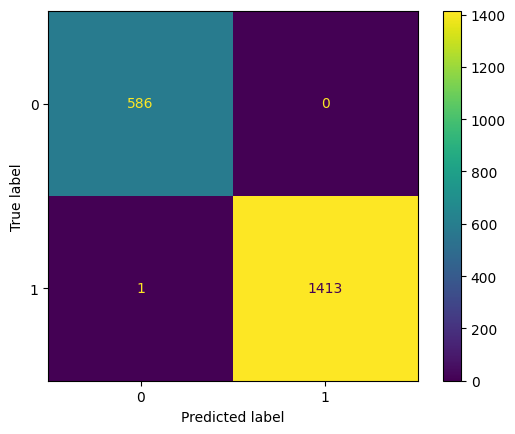

time: 404 ms (started: 2023-06-28 21:19:49 +00:00)


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=adaClf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaClf.classes_)
disp.plot()
plt.show()

### Adiabatic (QBoost)

Es necesario realizar una serie de transformaciones a los conjuntos de entrenamiento y de prueba para poder utilizarlos en un modelo QBoost.

In [ ]:
y_train['Etiqueta'] = y_train['Etiqueta'].apply(lambda cell : -1 if cell == 0 else 1)
y_train = y_train.to_numpy()
x_train = x_train.to_numpy()

y_test['Etiqueta'] = y_test['Etiqueta'].apply(lambda cell : -1 if cell == 0 else 1)
y_test = y_test.to_numpy()
x_test = x_test.to_numpy()

time: 17.3 ms (started: 2023-06-28 21:19:49 +00:00)


<ipython-input-189-372b33ff9e50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Etiqueta'] = y_train['Etiqueta'].apply(lambda cell : -1 if cell == 0 else 1)
<ipython-input-189-372b33ff9e50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Etiqueta'] = y_test['Etiqueta'].apply(lambda cell : -1 if cell == 0 else 1)


Estas funciones son las que vamos a utilizar para construir nuestro modelo QBoost.

In [ ]:
class DecisionStumpClassifier:
    """Decision tree classifier that operates on a single feature with a single splitting rule.

    The index of the feature used in the decision rule is stored
    relative to the original data frame.
    """

    def __init__(self, X, y, feature_index):
        """Initialize and fit the classifier.

        Args:
            X (array):
                2D array of feature vectors.  Note that the array
                contains all features, while the weak classifier
                itself uses only a single feature.
            y (array):
                1D array of class labels, as ints.  Labels should be
                +/- 1.
            feature_index (int):
                Index for the feature used by the weak classifier,
                relative to the overall data frame.
        """
        self.i = feature_index

        self.clf = DecisionTreeClassifier(max_depth=1)
        self.clf.fit(X[:, [feature_index]], y)

    def predict(self, X):
        """Predict class.

        Args:
            X (array):
                2D array of feature vectors.  Note that the array
                contains all features, while the weak classifier
                itself will make a prediction based only a single
                feature.

        Returns:
            Array of class labels.
        """
        return self.clf.predict(X[:, [self.i]])

class EnsembleClassifier:
    """Ensemble of weak classifiers."""

    def __init__(self, weak_classifiers, weights, weak_classifier_scaling, offset=1e-9):
        """Initialize ensemble from list of weak classifiers and weights.

        Args:
            weak_classifiers (list):
                List of classifier instances.
            weights (array):
                Weights associated with the weak classifiers.
            weak_classifier_scaling (float):
                Scaling for weak classifier outputs.
            offset (float):
                Offset value for ensemble classifier.  The default
                value is a small positive number used to prevent
                ambiguous 0 predictions when weak classifiers exactly
                balance each other out.
        """
        self.classifiers = weak_classifiers
        self.w = weights
        self.weak_clf_scale = weak_classifier_scaling
        self.offset = offset

    def predict(self, X):
        """Compute ensemble prediction.

        Note that this function returns the numerical value of the
        ensemble predictor, not the class label.  The predicted class
        is sign(predict()).
        """
        H = _build_H(self.classifiers, X, self.weak_clf_scale)

        # If we've already filtered out those with w=0 and we are only
        # using binary weights, this is just a sum
        preds = np.dot(H, self.w)
        return preds - self.offset

    def predict_class(self, X):
        """Compute ensemble prediction of class label."""
        preds = self.predict(X)

        # Add a small perturbation to any predictions that are exactly
        # 0, because these will not count towards either class when
        # passed through the sign function.  Such zero predictions can
        # happen when the weak classifiers exactly balance each other
        # out.
        preds[preds == 0] = 1e-9

        return np.sign(preds)

    def score(self, X, y):
        """Compute accuracy score on given data."""
        if sum(self.w) == 0:
            # Avoid difficulties that occur with handling this below
            return 0.0
        return f1_score(y, self.predict_class(X))

    def squared_error(self, X, y):
        """Compute squared error between predicted and true labels.

        Provided for testing purposes.
        """
        p = self.predict(X)
        return sum((p - y)**2)

    def fit_offset(self, X):
        """Fit offset value based on class-balanced feature vectors.

        Currently, this assumes that the feature vectors in X
        correspond to an even split between both classes.
        """
        self.offset = 0.0
        # Todo: review whether it would be appropriate to subtract
        # mean(y) here to account for unbalanced classes.
        self.offset = np.mean(self.predict(X))

    def get_selected_features(self):
        """Return list of features corresponding to the selected weak classifiers."""
        return [clf.i for clf, w in zip(self.classifiers, self.w) if w > 0]

    def get_confusion_matrix(self, X, y):
        return confusion_matrix(y, self.predict_class(X), labels=[-1, 1])

class QBoostClassifier(EnsembleClassifier):
    """Construct an ensemble classifier using quadratic loss minimization.

    """

    def __init__(self, X, y, lam, weak_clf_scale=None, drop_unused=True):
        """Initialize and fit QBoost classifier.

        X should already include all candidate features (e.g., interactions).

        Args:
            X (array):
                2D array of feature vectors.
            y (array):
                1D array of class labels (+/- 1).
            lam (float):
                regularization parameter.
            weak_clf_scale (float or None):
                scale factor to apply to weak classifier outputs.  If
                None, scale by 1/num_classifiers.
            drop_unused (bool):
                if True, only retain the nonzero weighted classifiers.
        """
        if not all(np.isin(y, [-1, 1])):
            raise ValueError("Class labels should be +/- 1")

        num_features = np.size(X, 1)

        if weak_clf_scale is None:
            weak_clf_scale = 1 / num_features

        wclf_candidates = [DecisionStumpClassifier(
            X, y, i) for i in range(num_features)]

        H = _build_H(wclf_candidates, X, weak_clf_scale)

        # For reference, store individual weak classifier scores.
        # Note: we don't check equality h==y here because H might be rescaled.
        self.weak_scores = np.array([np.mean(np.sign(h) * y > 0) for h in H.T])

        weights, self.energy = _minimize_squared_loss_binary(H, y, lam)

        # Store only the selected classifiers
        if drop_unused:
            weak_classifiers = [wclf for wclf, w in zip(
                wclf_candidates, weights) if w > 0]
            weights = weights[weights > 0]
        else:
            weak_classifiers = wclf_candidates

        super().__init__(weak_classifiers, weights, weak_clf_scale)
        self.fit_offset(X)

        # Save candidates so we can provide a baseline accuracy report.
        self._wclf_candidates = wclf_candidates

    def report_baseline(self, X, y):
        """Report accuracy of weak classifiers.

        This provides context for interpreting the performance of the boosted
        classifier.
        """
        scores = np.array([accuracy_score(y, clf.predict(X))
                           for clf in self._wclf_candidates])
        data = [[len(scores), scores.min(), scores.mean(), scores.max(), scores.std()]]
        headers = ['count', 'min', 'mean', 'max', 'std']

        print('Accuracy of weak classifiers (score on test set):')
        print(tabulate(data, headers=headers, floatfmt='.3f'))

time: 8.29 ms (started: 2023-06-28 21:19:49 +00:00)


In [ ]:
def _build_H(classifiers, X, output_scale):
    """Construct matrix of weak classifier predictions on given set of input vectors."""
    H = np.array([clf.predict(X) for clf in classifiers], dtype=float).T

    # Rescale H
    H *= output_scale

    return H

def qboost_lambda_sweep(X, y, lambda_vals, val_fraction=0.4, verbose=False, **kwargs):
    """Run QBoost using a series of lambda values and check accuracy against a validation set.

    Args:
        X (array):
            2D array of feature vectors.
        y (array):
            1D array of class labels (+/- 1).
        lambda_vals (array):
            Array of values for regularization parameter, lambda.
        val_fraction (float):
            Fraction of given data to set aside for validation.
        verbose (bool):
            Print out diagnostic information to screen.
        kwargs:
            Passed to QBoost.__init__.

    Returns:
        QBoostClassifier:
            QBoost instance with best validation score.
        lambda:
            Lambda value corresponding to the best validation score.
    """
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=val_fraction)

    best_score = -1
    best_lambda = None
    best_clf = None

    if verbose:
        print('{:7} {} {}:'.format('lambda', 'n_features', 'score'))

    for lam in lambda_vals:
        qb = QBoostClassifier(X_train, y_train, lam, **kwargs)
        score = qb.score(X_val, y_val)
        if verbose:
            print('{:<7.4f} {:<10} {:<6.3f}'.format(
                lam, len(qb.get_selected_features()), score))
        if score > best_score:
            best_score = score
            best_clf = qb
            best_lambda = lam

    return best_clf, lam

def _build_bqm(H, y, lam):
    """Build BQM.

    Args:
        H (array):
            2D array of weak classifier predictions.  Each row is a
            sample point, each column is a classifier.
        y (array):
            Outputs
        lam (float):
            Coefficient that controls strength of regularization term
            (larger values encourage decreased model complexity).
    """
    n_samples = np.size(H, 0)
    n_classifiers = np.size(H, 1)

    # samples_factor is a factor that appears in front of the squared
    # loss term in the objective.  In theory, it does not affect the
    # problem solution, but it does affect the relative weighting of
    # the loss and regularization terms, which is otherwise absorbed
    # into the lambda parameter.

    # Using an average seems to be more intuitive, otherwise, lambda
    # is sample-size dependent.
    samples_factor = 1.0 / n_samples

    bqm = dimod.BQM('BINARY')
    bqm.offset = samples_factor * n_samples

    for i in range(n_classifiers):
        # Note: the last term with h_i^2 is part of the first term in
        # Eq. (12) of Neven et al. (2008), where i=j.
        bqm.add_variable(i, lam - 2.0 * samples_factor *
                         np.dot(H[:, i], y) + samples_factor * np.dot(H[:, i], H[:, i]))

    for i in range(n_classifiers):
        for j in range(i+1, n_classifiers):
            # Relative to Eq. (12) from Neven et al. (2008), the
            # factor of 2 appears here because each term appears twice
            # in a sum over all i,j.
            bqm.add_interaction(
                i, j, 2.0 * samples_factor * np.dot(H[:, i], H[:, j]))

    return bqm


def _minimize_squared_loss_binary(H, y, lam):
    """Minimize squared loss using binary weight variables."""
    bqm = _build_bqm(H, y, lam)

    sampler = EmbeddingComposite(DWaveSampler(token=token, endpoint=endpoint))
    results = sampler.sample(bqm, label='QBoost')
    weights = np.array(list(results.first.sample.values()))
    energy = results.first.energy

    return weights, energy

time: 3.48 ms (started: 2023-06-28 21:19:49 +00:00)


El valor de lambda es el recomendado por el desarrollo del proyecto en el que nos estamos basando.

In [ ]:
lam = 0.0006944444444444445
qboost = QBoostClassifier(x_train, y_train, lam)

time: 7.62 s (started: 2023-06-28 21:19:50 +00:00)


In [ ]:
print('Score on test set: {:.3f}'.format(qboost.score(x_test, y_test)))

Score on test set: 0.949
time: 11.5 ms (started: 2023-06-28 21:19:57 +00:00)


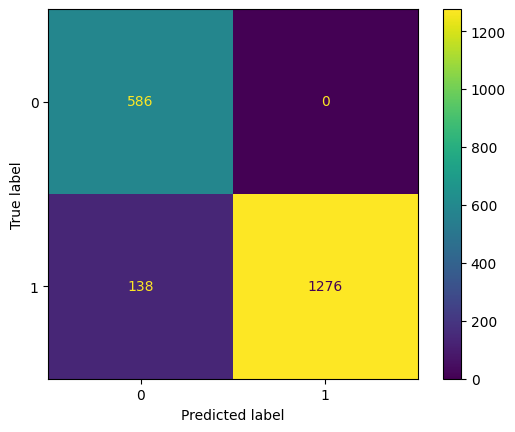

time: 262 ms (started: 2023-06-28 21:19:57 +00:00)


In [ ]:
cm = qboost.get_confusion_matrix(x_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()